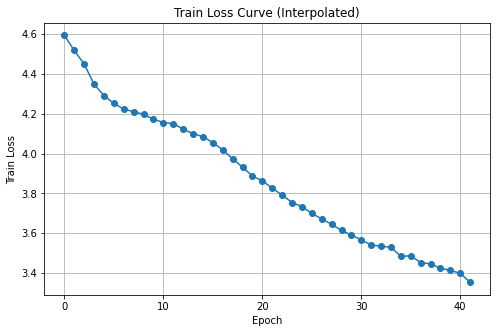

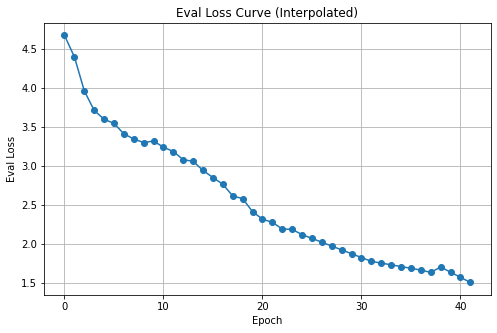

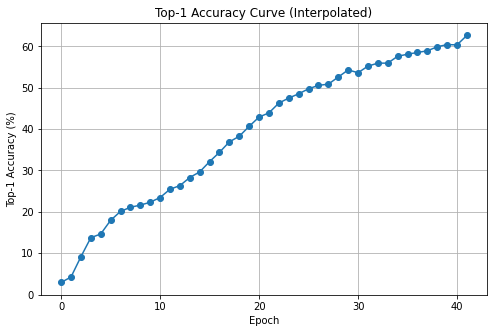

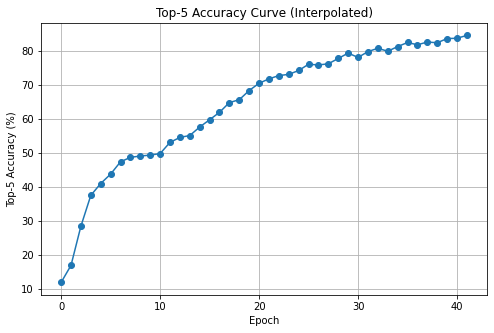

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("summary.csv")
df["epoch"] = df["epoch"].astype(int)
df["eval_loss"] = df["eval_loss"].interpolate()
df["train_loss"] = df["train_loss"].interpolate()
df["eval_top1"] = df["eval_top1"].interpolate()
df["eval_top5"] = df["eval_top5"].interpolate()

def plot_curve(x, y, title, ylabel):
    plt.figure(figsize=(8,5))
    plt.plot(x, y, marker="o")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

plot_curve(df["epoch"], df["train_loss"], "Train Loss Curve (Interpolated)", "Train Loss")
plot_curve(df["epoch"], df["eval_loss"], "Eval Loss Curve (Interpolated)", "Eval Loss")
plot_curve(df["epoch"], df["eval_top1"], "Top-1 Accuracy Curve (Interpolated)", "Top-1 Accuracy (%)")
plot_curve(df["epoch"], df["eval_top5"], "Top-5 Accuracy Curve (Interpolated)", "Top-5 Accuracy (%)")


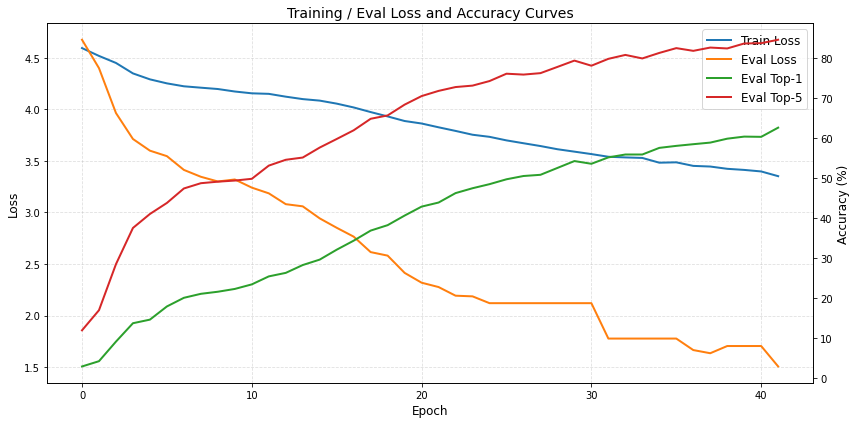

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("summary.csv")
df = df.fillna(method="ffill")


fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df["epoch"], df["train_loss"], label="Train Loss", color="#1f77b4", linewidth=2)
ax1.plot(df["epoch"], df["eval_loss"], label="Eval Loss", color="#ff7f0e", linewidth=2)

ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Loss", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.4)

ax2 = ax1.twinx()
ax2.plot(df["epoch"], df["eval_top1"], label="Eval Top-1", color="#2ca02c", linewidth=2)
ax2.plot(df["epoch"], df["eval_top5"], label="Eval Top-5", color="#d62728", linewidth=2)

ax2.set_ylabel("Accuracy (%)", fontsize=12)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right", fontsize=12)

plt.title("Training / Eval Loss and Accuracy Curves", fontsize=14)
plt.tight_layout()
plt.show()
